# Clustering
In this file, instructions how to approach the challenge can be found.

We can use different types of clustering algorithms:

- KMeans
- Hierarchical
- DBScan

## Segmentation of NYC neighborhoods

The goal of this project is to segment the neighborhoods of New York City into separate clusters and examine the information about them. For clustering, We can use any available information **except** demographic and economic indicators. We don't want to segment them based on those and we want to keep them for the **profiling of clusters** to see if there are any important economic differences between the created clusters.

### Feature Engineering

Feature engineering plays a crucial role in this problem. We have limited amount of attributes so we need to create some features that will be important for segmentation.

- Google Places, Yelp and Foursquare APIs: number of venues, density of venues per square mile, number of restaurants, top restarurant category...
- Uber: number of rides per day in the neighborhood
- Meetups: number of events
- etc...

[Feature Engineering Article](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)

[Another Feature Engineering Article](https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b)

[Scaling/Normilization](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv('clean_data/merged_pois_cleaned.csv')
# df = df[['Zipcode','Reviews','Rating','Price','Borough']]

Scaling was done during the data prep phase, in which the rating and review columns (both categorical ordinal) were first changed to numeric types using the map() class, then scaled using the MinMaxScalar from a range of 0 to 5.

In [3]:
# Numerical encoding of all categorical (nominal) variables
from sklearn.preprocessing import LabelEncoder

# Set variable to label encoder class
gle = LabelEncoder()

# Encode Boroughs feature
Borough_labels = gle.fit_transform(df['Borough'])
Borough_mappings = {index: label for index, label in enumerate(gle.classes_)}
df['BoroughLabel'] = Borough_labels

# Encode Name feature
Name_labels = gle.fit_transform(df['Name'])
Name_mappings = {index: label for index, label in enumerate(gle.classes_)}
df['NameLabel'] = Borough_labels

# Encode Neighbourhood feature
Neighbourhood_labels = gle.fit_transform(df['Neighbourhood'])
Neighbourhood_mappings = {index: label for index, label in enumerate(gle.classes_)}
df['NeighbourhoodLabel'] = Neighbourhood_labels

# Encode Category feature
Category_labels = gle.fit_transform(df['Category'])
Category_mappings = {index: label for index, label in enumerate(gle.classes_)}
df['CategoryLabel'] = Category_labels

In [4]:
df.head()

,Distance (m),Name,Neighbourhood,Zipcode,Reviews,Rating,Price,Latitude,Longitude,Borough,Category,BoroughLabel,NameLabel,NeighbourhoodLabel,CategoryLabel
0,127.0,Lollipops Gelato,Northeast Bronx,10466.0,NaN,4.215686,1.0,40.894705,-73.847201,Bronx,restaurant,0,0,42,1
1,821.0,Ali's Roti Shop,Northeast Bronx,10466.0,545.0,4.000000,1.0,40.894000,-73.856840,Bronx,restaurant,0,0,42,1
2,983.0,Jimbo's Hamburger Palace,Northeast Bronx,10466.0,24.0,3.000000,1.0,40.891804,-73.858604,Bronx,restaurant,0,0,42,1
3,454.0,Cooler Runnings Jamaican Restaurant,Northeast Bronx,10466.0,50.0,3.000000,1.0,40.898157,-73.850290,Bronx,restaurant,0,0,42,1
4,902.0,McDonald's,Northeast Bronx,10470.0,NaN,2.725490,1.0,40.894705,-73.847201,Bronx,restaurant,0,0,42,1


C:\Users\joshu\AppData\Local\Temp\ipykernel_26604\1655221195.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df.corr()


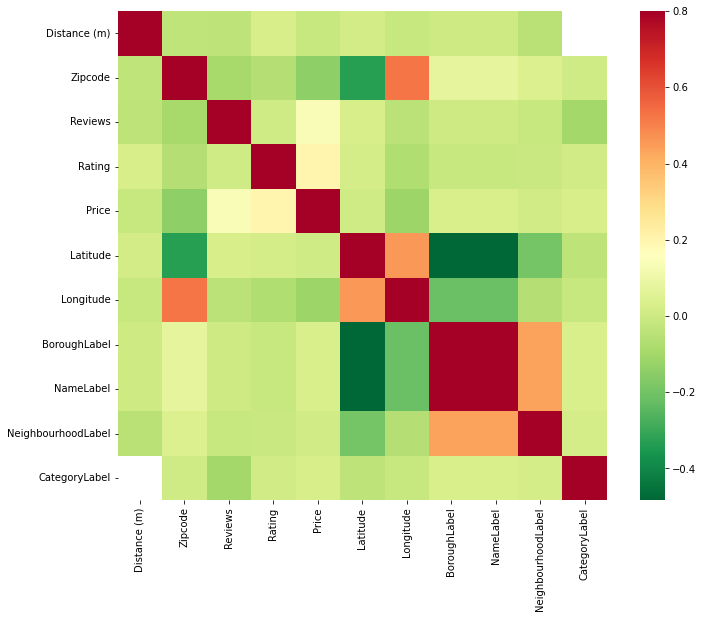

In [5]:
cormat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(cormat, vmax=.8, square=True, cmap="RdYlGn_r");

C:\Users\joshu\AppData\Local\Temp\ipykernel_26604\2987222556.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


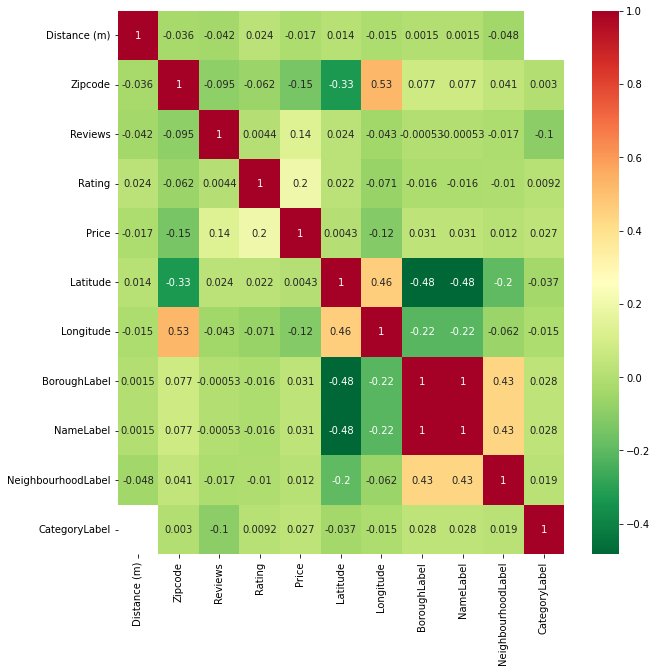

In [6]:
# Most correlated features with Borough
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat['BoroughLabel'])>0]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

### Feature Selection / Dimensionality Reduction
We need to apply different selection techniques to find out which one will be the best for our problems.

Original Features vs. PCA components?

Don't forget to scale the features for KMeans.

Articles

[Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/)

[Feature Selection 2](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

[Feature Selection - Chi-Square Test](https://machinelearningmastery.com/feature-selection-with-categorical-data/)

[Feature Selection w/ Scikit-learn 1](https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/)

[Feature Selection w/ Scikit-learn 2](https://scikit-learn.org/stable/modules/feature_selection.html)

[PCA](https://drscotthawley.github.io/blog/2019/12/21/PCA-From-Scratch.html)

[PCA2](https://www.datacamp.com/tutorial/principal-component-analysis-in-python)

#### Feature Selection

In [7]:
# To select the most optimal features, we will do a chi-square test, as our data is a categorical (nominal/ordinal) input,
# and will have a categorical output

In [8]:
# Chi-squared test

#### PCA

In [9]:
# We will use principal component analysis to reduce the dimensions of all our features into 2 dimension
# To accompany our PCA, we will have a loading table, and a 2D biplot

### Modeling

Use different attributes and clustering techniques and compare the created clusters:

- clustering only on restaurant features
- clustering only on Uber features
- clustering only on location
- combination of all

**Questions:**
1. Which clustering is the best?
2. How are neighborhoods split when we select only 2 clusters?
3. Are there any differences in housing and rental costs in different clusters?

In [10]:
# We will be using the K-means clustering algorithm to model all of our features
# Strecth - if we have time we can also try hierarchical, then if more time, DBSCAN

### Evaluation

1. Check the segmentation evaluation metrics:
    - inertia
    - silhoutte score
2. How did you come up with the correct number of clusters?
3. Is there any relationship between the clusters and economic indicators? If yes, what does it mean?

You are required to share the file containing all NYC neighborhoods together with cluster_id with LighthouseLabs.

[Silohutte Score Plot Article](https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam)

[Inertia Article aka Elbow Rule](https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet)

[Clustering Article](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)

In [11]:
# To evaluate our k-means models, we can use intertia, aka an elbow plot to ensure we chose the optimal number of clusters
# To further evaluate our k-means models, we can visualize the optimal amount of clusters with a silhoutte plot and score